# from allcools page:

Preclustering and Cluster Enriched Features
Purpose
The purpose of this step is to perform a simple pre-clustering using the highly variable features to get a pre-clusters labeling. We then select top enriched features for each cluster (CEF) for further analysis.



Input¶
HVF adata file.

Output
HVF adata file with pre-clusters and CEF annotated.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import anndata
import scanpy as sc
from ALLCools.clustering import cluster_enriched_features, significant_pc_test, log_scale
from ALLCools.clustering import log_scale

In [2]:
sns.set_context(context='notebook', font_scale=1.3)

In [18]:
adata_path = 'mCG.HVF.h5ad'

var_dim = 'chrom100k'
# Cluster Enriched Features analysis
top_n=500
alpha=0.05
stat_plot=True

# you may provide a pre calculated cluster version. 
# If None, will perform basic clustering using parameters below.
cluster_col = None  

# These parameters only used when cluster_col is None
k=25
resolution=1
cluster_plot=True

In [13]:
adata = anndata.read_h5ad(adata_path)
adata

AnnData object with n_obs × n_vars = 120 × 25000
    obs: 'leiden'
    var: 'chrom', 'end', 'start', 'CHN_mean', 'CHN_dispersion', 'CHN_cov', 'CHN_score', 'CHN_feature_select', 'CGN_mean', 'CGN_dispersion', 'CGN_cov', 'CGN_score', 'CGN_feature_select', 'leiden_enriched_features'
    uns: 'leiden', 'leiden_colors', 'leiden_feature_enrichment', 'log', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

adata.X is already log transformed, skip log step.
9 components passed P cutoff of 0.1.
Changing adata.obsm['X_pca'] from shape (120, 100) to (120, 9)


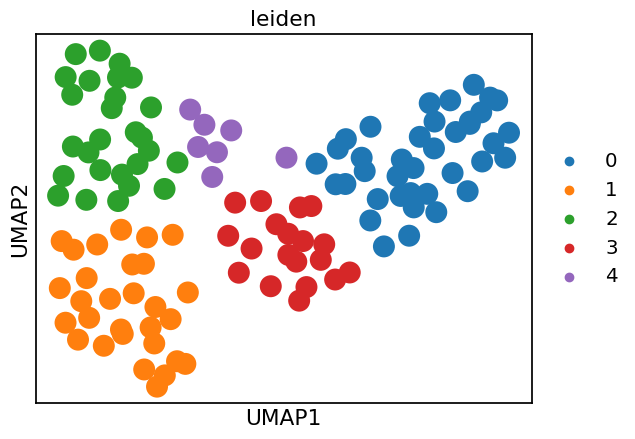

In [14]:
# Pre clustering
#mCG

if cluster_col is None:
    # IMPORTANT
    # put the unscaled matrix in adata.raw
    adata.raw = adata
    log_scale(adata)
    
    sc.tl.pca(adata, n_comps=100)
    significant_pc_test(adata, p_cutoff=0.1, update=True)
    
    sc.pp.neighbors(adata, n_neighbors=k)
    sc.tl.leiden(adata, resolution=resolution)
    
    if cluster_plot:
        sc.tl.umap(adata)
        sc.pl.umap(adata, color='leiden')
        
    # return to unscaled X, CEF need to use the unscaled matrix
    adata = adata.raw.to_adata()
    
    cluster_col = 'leiden'

In [15]:
#save plot
plt.savefig(f"mcg_precluster_{var_dim}.png")

<Figure size 640x480 with 0 Axes>

Found 5 clusters to compute feature enrichment score
Computing enrichment score
Computing enrichment score FDR-corrected P values


/share/lasallelab/Ensi/anaconda3/lib/python3.11/site-packages/ALLCools/clustering/feature_selection/feature_enrichment.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for label, sub_df in raw_adata.obs.groupby(labels):
/share/lasallelab/Ensi/anaconda3/lib/python3.11/site-packages/ALLCools/clustering/feature_selection/feature_enrichment.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for label, sub_df in raw_adata.obs.groupby(labels):


Selected 2050 unique features


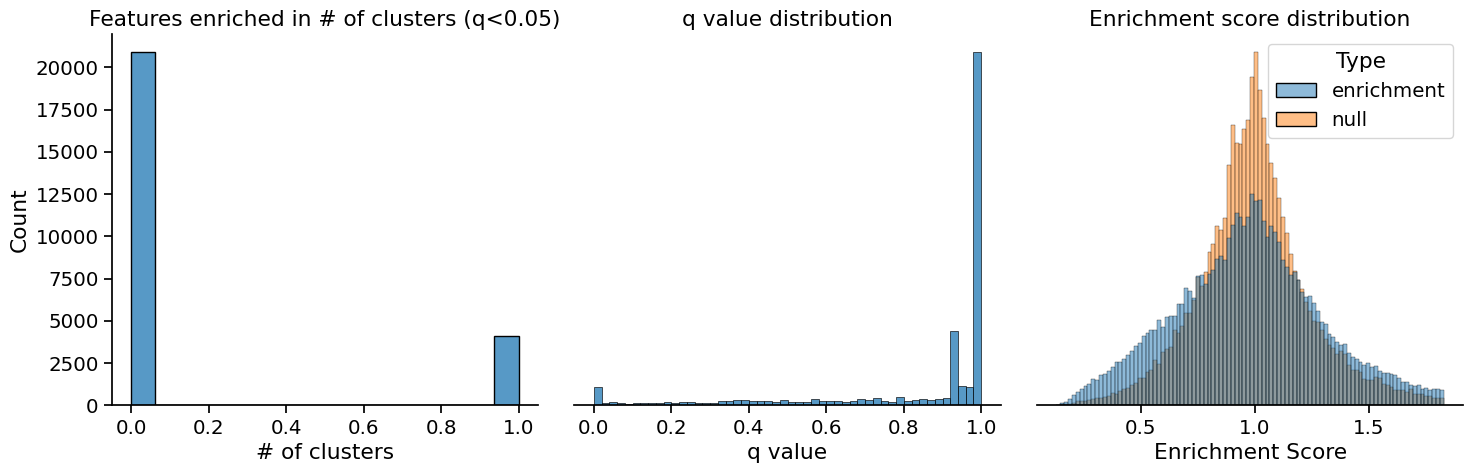

In [17]:
cluster_enriched_features(adata,
                          cluster_col=cluster_col,
                          top_n=top_n,
                          alpha=alpha,
                          stat_plot=True)

In [11]:
# save 
plt.savefig(f"mcg_CEF_alpha0.05topn500_{var_dim}.png")

<Figure size 640x480 with 0 Axes>

In [10]:
# save adata
adata.write_h5ad(adata_path)
adata

AnnData object with n_obs × n_vars = 120 × 25000
    obs: 'leiden'
    var: 'chrom', 'end', 'start', 'CHN_mean', 'CHN_dispersion', 'CHN_cov', 'CHN_score', 'CHN_feature_select', 'CGN_mean', 'CGN_dispersion', 'CGN_cov', 'CGN_score', 'CGN_feature_select', 'leiden_enriched_features'
    uns: 'log', 'pca', 'neighbors', 'leiden', 'umap', 'leiden_colors', 'leiden_feature_enrichment'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'